In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn

In [2]:
from dtree import *
import monkdata as m
from drawtree_qt5 import *

# 2. Monk data set

### Assignment 0

Sample monk3 has additional noise and complex model (6 parameters).


# 3. Entropy

### Assignment 1

Calculation of the entropy with function entropy

In [3]:
m1=m.monk1
entropy(m1)

1.0

In [4]:
m2=m.monk2
entropy(m2)

0.957117428264771

In [5]:
m3=m.monk3
entropy(m3)

0.9998061328047111

### Assignment 2

Entropy is a measure of uncertainty.

Entropy is maximized with a uniform distribution.

Let's consider a dice. 

With a real dice,  $entropy=-6*\frac{1}{6}*log2(\frac{1}{6})=2.58$. 

With a fake dice where p1=0.1, p2=0.1, ..., p5=0.1 and p6=0.5,  $entropy=-5*0.1*log2(0.1)-1*0.5*log2(0.5)=2.16$.  

The entropy is greater with real dice

# 4. Information gain

we compute the information gain for each dataset and each attribute

### For monk1

In [6]:
m1=m.monk1
print("Attribute 1:",averageGain(m1,m.attributes[0]))
print("Attribute 2:",averageGain(m1,m.attributes[1]))
print("Attribute 3:",averageGain(m1,m.attributes[2]))
print("Attribute 4:",averageGain(m1,m.attributes[3]))
print("Attribute 5:",averageGain(m1,m.attributes[4]))
print("Attribute 6:",averageGain(m1,m.attributes[5]))

Attribute 1: 0.07527255560831925
Attribute 2: 0.005838429962909286
Attribute 3: 0.00470756661729721
Attribute 4: 0.02631169650768228
Attribute 5: 0.28703074971578435
Attribute 6: 0.0007578557158638421


### For monk2

In [7]:
m2=m.monk2
print("Attribute 1:",averageGain(m2,m.attributes[0]))
print("Attribute 2:",averageGain(m2,m.attributes[1]))
print("Attribute 3:",averageGain(m2,m.attributes[2]))
print("Attribute 4:",averageGain(m2,m.attributes[3]))
print("Attribute 5:",averageGain(m2,m.attributes[4]))
print("Attribute 6:",averageGain(m2,m.attributes[5]))

Attribute 1: 0.0037561773775118823
Attribute 2: 0.0024584986660830532
Attribute 3: 0.0010561477158920196
Attribute 4: 0.015664247292643818
Attribute 5: 0.01727717693791797
Attribute 6: 0.006247622236881467


### For monk3

In [8]:
m3=m.monk3
print("Attribute 1:",averageGain(m3,m.attributes[0]))
print("Attribute 2:",averageGain(m3,m.attributes[1]))
print("Attribute 3:",averageGain(m3,m.attributes[2]))
print("Attribute 4:",averageGain(m3,m.attributes[3]))
print("Attribute 5:",averageGain(m3,m.attributes[4]))
print("Attribute 6:",averageGain(m3,m.attributes[5]))

Attribute 1: 0.007120868396071844
Attribute 2: 0.29373617350838865
Attribute 3: 0.0008311140445336207
Attribute 4: 0.002891817288654397
Attribute 5: 0.25591172461972755
Attribute 6: 0.007077026074097326


### Assignment 3

The information gain is the greatest with attribute 5, so this attribute should be used for splitting the examples at the root node.

### Assignment4

The information gain increases when the entropy of the subsets decreases. So to minimize the entropy (=minimize uncertainty) the information gain should be maximized. This is why the information gain can be used as a heuristic.

# 5. Building decision trees

### Subset where A5=1

In [9]:
m1=m.monk1
m1_5_is_1=select(m1,m.attributes[4],1)
print("Attribute 1:",averageGain(m1_5_is_1,m.attributes[0]))
print("Attribute 2:",averageGain(m1_5_is_1,m.attributes[1]))
print("Attribute 3:",averageGain(m1_5_is_1,m.attributes[2]))
print("Attribute 4:",averageGain(m1_5_is_1,m.attributes[3]))
print("Attribute 6:",averageGain(m1_5_is_1,m.attributes[5]))

Attribute 1: 0.0
Attribute 2: 0.0
Attribute 3: 0.0
Attribute 4: 0.0
Attribute 6: 0.0


The gain information is zero for all attributes because there are only 'TRUE' in m1_5_is_2

In [13]:
mostCommon(m1_5_is_1)

True

### Subset where A5=2

In [16]:
m1_5_is_2=select(m1,m.attributes[4],2)
print("Attribute 1:",averageGain(m1_5_is_2,m.attributes[0]))
print("Attribute 2:",averageGain(m1_5_is_2,m.attributes[1]))
print("Attribute 3:",averageGain(m1_5_is_2,m.attributes[2]))
print("Attribute 4:",averageGain(m1_5_is_2,m.attributes[3]))
print("Attribute 6:",averageGain(m1_5_is_2,m.attributes[5]))

Attribute 1: 0.040216841609413634
Attribute 2: 0.015063475072186083
Attribute 3: 0.03727262736015946
Attribute 4: 0.04889220262952931
Attribute 6: 0.025807284723902146


We should test attribute 4

We study the different cases: a4=1; a4=2; a4=3

In [17]:
m1_5_is_2_4_is_1=select(m1_5_is_2,m.attributes[3],1)
mostCommon(m1_5_is_2_4_is_1)

False

In [18]:
m1_5_is_2_4_is_2=select(m1_5_is_2,m.attributes[3],2)
mostCommon(m1_5_is_2_4_is_2)

False

In [20]:
m1_5_is_2_4_is_3=select(m1_5_is_2,m.attributes[3],3)
mostCommon(m1_5_is_2_4_is_3)

False

### Subset where A5=3

In [23]:
m1_5_is_3=select(m1,m.attributes[4],3)
print("Attribute 1:",averageGain(m1_5_is_3,m.attributes[0]))
print("Attribute 2:",averageGain(m1_5_is_3,m.attributes[1]))
print("Attribute 3:",averageGain(m1_5_is_3,m.attributes[2]))
print("Attribute 4:",averageGain(m1_5_is_3,m.attributes[3]))
print("Attribute 6:",averageGain(m1_5_is_3,m.attributes[5]))

Attribute 1: 0.03305510013455182
Attribute 2: 0.002197183539100922
Attribute 3: 0.017982293842278896
Attribute 4: 0.01912275517747053
Attribute 6: 0.04510853782483648


We should test attribute 6

We study the different cases: a6=1; a6=2

In [24]:
m1_5_is_3_6_is_1=select(m1_5_is_3,m.attributes[5],1)
mostCommon(m1_5_is_3_6_is_1)

False

In [25]:
m1_5_is_3_6_is_2=select(m1_5_is_3,m.attributes[5],2)
mostCommon(m1_5_is_3_6_is_2)

False

### Subset where A5=4

In [27]:
m1_5_is_4=select(m1,m.attributes[4],4)
print("Attribute 1:",averageGain(m1_5_is_4,m.attributes[0]))
print("Attribute 2:",averageGain(m1_5_is_4,m.attributes[1]))
print("Attribute 3:",averageGain(m1_5_is_4,m.attributes[2]))
print("Attribute 4:",averageGain(m1_5_is_4,m.attributes[3]))
print("Attribute 6:",averageGain(m1_5_is_4,m.attributes[5]))

Attribute 1: 0.20629074641530198
Attribute 2: 0.033898395077640586
Attribute 3: 0.025906145434984817
Attribute 4: 0.07593290844153944
Attribute 6: 0.0033239629631565126


We should test attribute 1

We study the different cases: a1=1; a1=2; a1=3

In [32]:
m1_5_is_4_1_is_1=select(m1_5_is_4,m.attributes[0],1)
mostCommon(m1_5_is_4_1_is_1)

False

In [33]:
m1_5_is_4_1_is_2=select(m1_5_is_4,m.attributes[0],2)
mostCommon(m1_5_is_4_1_is_2)

False

In [34]:
m1_5_is_4_1_is_3=select(m1_5_is_4,m.attributes[0],3)
mostCommon(m1_5_is_4_1_is_3)

True

In [36]:
t=buildTree(m.monk1,m.attributes,2)
print(t)
print(check(t,m.monk1test))

A5(+A4(---)A6(--)A1(--+))
0.7222222222222222


We find the same tree with function buildTree

### Assignment 5

building the full tree

In [51]:
t1=buildTree(m.monk1,m.attributes)
print(check(t1,m.monk1test))
print(check(t1,m.monk1))

0.8287037037037037
1.0


In [53]:
t2=buildTree(m.monk2,m.attributes)
print(check(t2,m.monk2test))
print(check(t2,m.monk2))

0.6921296296296297
1.0


In [54]:
t3=buildTree(m.monk3,m.attributes)
print(check(t3,m.monk3test))
print(check(t3,m.monk3))

0.9444444444444444
1.0


Our asumption was incorrect, monk2 is the worse dataset. There is no error with the training set since the model was train with this dataset

# 6. Pruning

### Assignment 6 
Pruning reduces the number of nodes and leads to a less complex model. Since the number of nodes decreases the model may be less accurate: the bias increases. But since the model is les complex, the variance decreases. This is a way to avoid overfitting

In [41]:
import random

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

monk1train, monk1val = partition(m.monk1, 0.6)
t=buildTree(monk1train,m.attributes)

In [42]:
print(t)

A5(+A4(A2(+A1(-+-)A1(--+))A2(-+-)A3(+-))A4(A1(+A2(-+-)+)A1(A2(+--)A2(-+-)-)A2(+-A1(--+)))A1(-A2(-+-)A2(--+)))


In [46]:
drawTree(t)

SystemExit: 0

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [47]:
import dtree as d

def pruning(t,monkval):
    stop=False
    while stop==False:
        updated=False
        listOfTrees=d.allPruned(t) #contains all the tree that can be obtained after pruning t
        max=d.check(t,monkval) #best performance so far
        for i in range(len(listOfTrees)):
            if d.check(listOfTrees[i],monkval) >= max: #a better tree has been found
                max=d.check(listOfTrees[i],monkval)
                t=listOfTrees[i] #the tree is updated
                updated=True
        if updated==False: #no better tree has been found
            stop=True
    return(t)

In [48]:
pruning(t,monk1val)

A5(+--A1(-A2(-+-)A2(--+)))

### Assignment 7

We want to find the best way to do the partition between training set and validation set. For each value of 'partition', we run 1000 simulations and compute the mean and standard deviation.

For monk1:

In [49]:
n=1000
results=[[0 for i in range (n)] for j in range(6)]

for j in range(6):
    fraction=0.3+0.1*j
        
    for k in range(n):
        monk1train, monk1val = partition(m.monk1,fraction)
        t=d.buildTree(monk1train,m.attributes)
        t=pruning(t,monk1val)
        results[j][k]=d.check(t,m.monk1test)
print("no runtime error")

no runtime error


In [55]:
fraction=np.linspace(0.3,0.8,6)

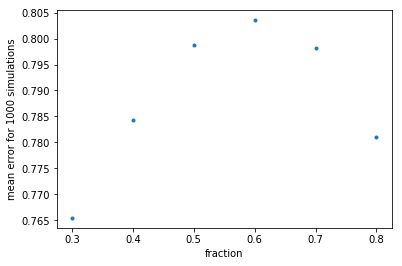

In [56]:
mean=np.mean(results,axis=1)
plt.plot(fraction,mean,'.')
plt.xlabel('fraction')
plt.ylabel('mean error for 1000 simulations')
plt.show()
plt.close()

In [57]:
print(mean[3])

0.803527777778


The model is less accurate but simpler

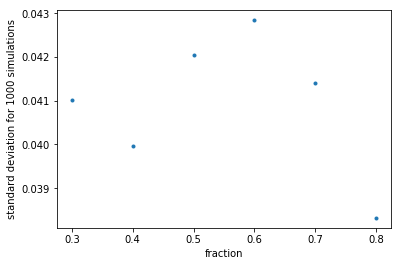

In [227]:
std=np.std(results,axis=1)
plt.plot(fraction,std,'.')
plt.xlabel('fraction')
plt.ylabel('standard deviation for 1000 simulations')
plt.show()
plt.close()

For monk3

In [59]:
n=1000
results=[[0 for i in range (n)] for j in range(6)]

for j in range(6):
    fraction=0.3+0.1*j
        
    for k in range(n):
        monk3train, monk3val = partition(m.monk3,fraction)
        t=d.buildTree(monk3train,m.attributes)
        t=pruning(t,monk3val)
        results[j][k]=d.check(t,m.monk3test)

In [60]:
fraction=np.linspace(0.3,0.8,6)

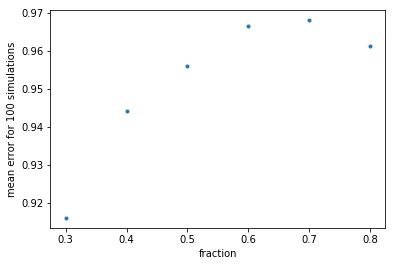

In [64]:
mean=np.mean(results,axis=1)
plt.plot(fraction,mean,'.')
plt.xlabel('fraction')
plt.ylabel('mean error for 100 simulations')
plt.show()
plt.close()

In [65]:
print(mean[4])

0.968041666667


The model is better after pruning

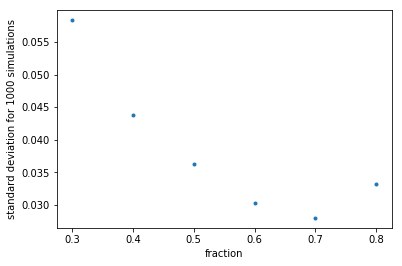

In [66]:
std=np.std(results,axis=1)
plt.plot(fraction,std,'.')
plt.xlabel('fraction')
plt.ylabel('standard deviation for 1000 simulations')
plt.show()
plt.close()